In [22]:
#Лабораторная работа  № 1  Бинарная классификация.  Вариант 6 (moons; Random_state = 23; noise = 0.3)

from sklearn.datasets import make_blobs, make_moons
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Для отображения на графике области принятия решения - готовую функцию
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    x1, x2 = np.meshgrid(xx, yy)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(x1,
                    x2,
                    decision_values.reshape(x1.shape),
                    levels=fill_levels,
                    colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(x1,
                   x2,
                   decision_values.reshape(x1.shape),
                   levels=levels,
                   colors='black')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

Координаты точек: 
[[ 0.24466644  0.86610506]
 [ 1.01528017 -0.37900557]
 [ 1.47476623 -0.15216309]
 [ 0.61469792 -0.45972114]
 [ 1.15479494 -0.03500654]
 [-1.19979695  1.23153065]
 [ 0.91064492 -0.53652016]
 [-0.44027146 -0.02551324]
 [ 0.54895243  1.06247059]
 [ 0.48786546  0.93335336]
 [ 1.12844913 -0.69976443]
 [-0.16531888  0.91036123]
 [ 1.27475831 -0.36697646]
 [ 1.71142978 -0.77879111]
 [ 1.93306177  0.08089445]]
Метки класса: 
[0 1 1 1 1 0 0 1 0 0 1 0 1 1 1]


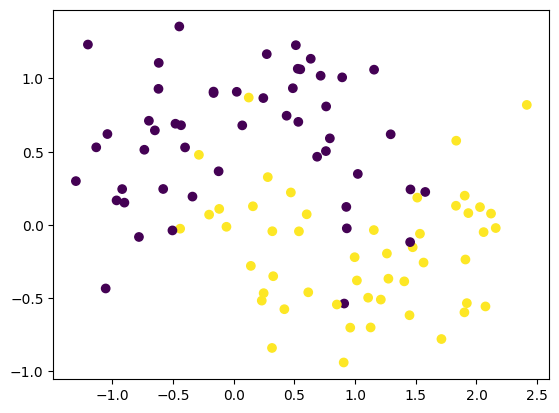

In [23]:
# Генерация выборки
X, y = make_moons(noise= 0.3, random_state=23)
# Массивы X и y
print('Координаты точек: ')
print(X[:15])
print('Метки класса: ')
print(y[:15])

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.1,  random_state=23)

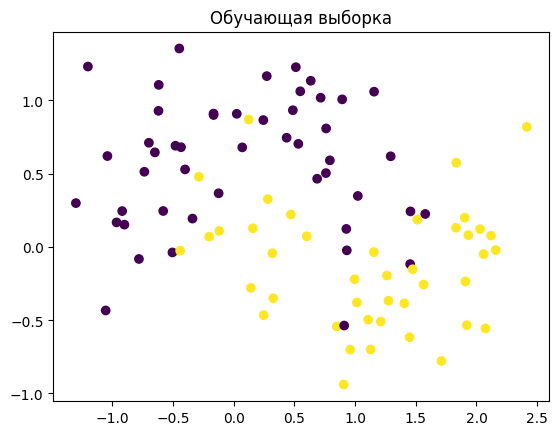

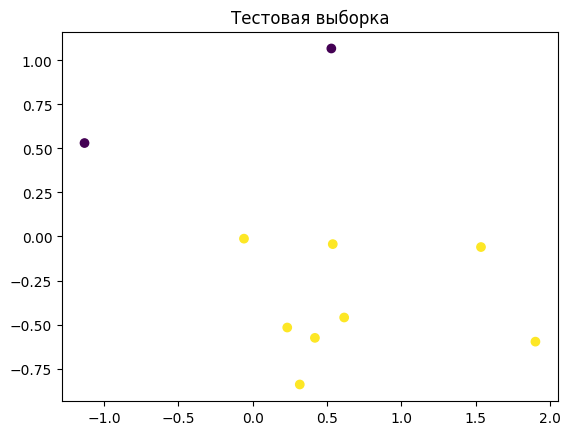

In [24]:
# Разбиение выборки 90% обучающегося и  10% тестового множества
plt.title('Обучающая выборка')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

plt.title('Тестовая выборка')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

Prediction and test: 
[1 0 1 1 0 1 1 0 1 1]
[1 1 1 1 0 1 1 0 1 1]
Confusion matrix: 
[[2 0]
 [1 7]]
Accuracy score:  0.9


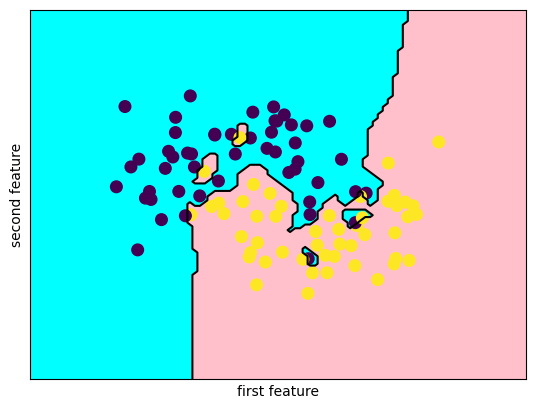

In [25]:
# Создание переменной  - модель классификатора
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
# Обучение модели 
knn.fit(X_train, y_train)
# Оценка качества
prediction = knn.predict(X_test)
# Вывод результатов
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

Prediction and test: 
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 2 19]]
Accuracy score:  0.9142857142857143


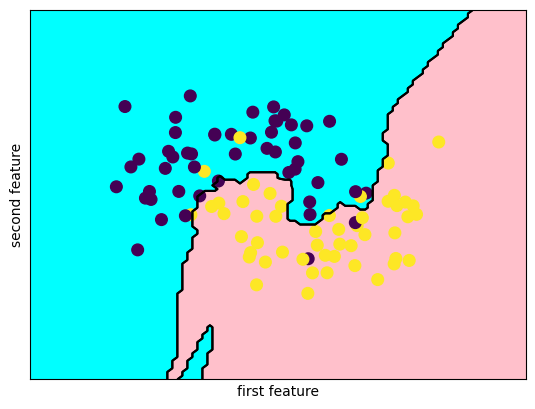

In [36]:
# Метод ближайших соседей (3)
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# Обучение модели
knn.fit(X_train, y_train)
# Оценка качества
prediction = knn.predict(X_test)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Prediction and test: 
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 2 19]]
Accuracy score:  0.9142857142857143


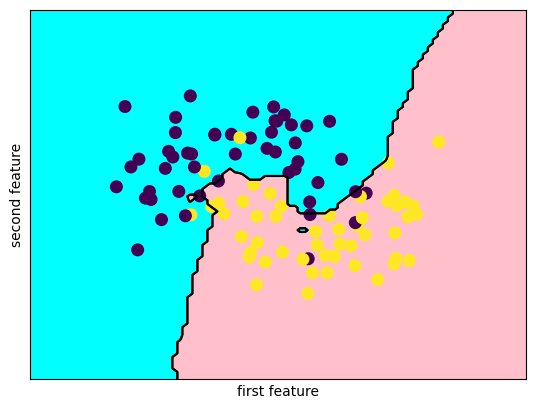

In [37]:
# Метод ближайших соседей (5)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# Обучение модели
knn.fit(X_train, y_train)
# Оценка качества
prediction = knn.predict(X_test)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Prediction and test: 
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 2 19]]
Accuracy score:  0.9142857142857143


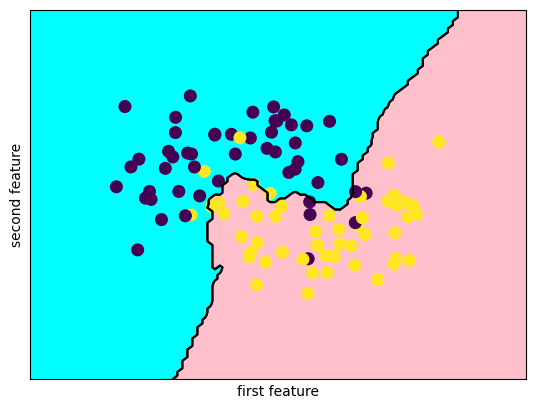

In [38]:
# Метод ближайших соседей (9)
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
# Обучение модели
knn.fit(X_train, y_train)
# Оценка качества
prediction = knn.predict(X_test)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))


Prediction and test: 
[0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 4 17]]
Accuracy score:  0.8571428571428571


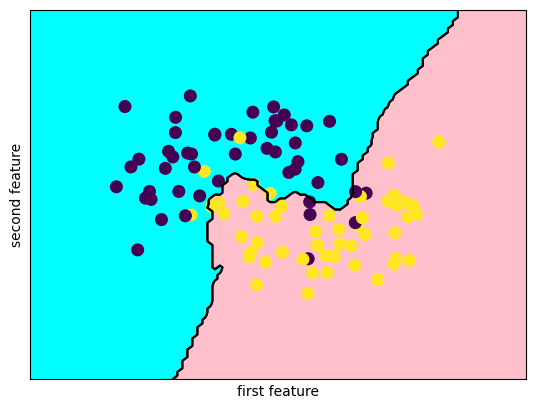

In [39]:
# Метод наивного байесовского классификатора
nb = GaussianNB()
# Обучение модели 
nb.fit(X_train, y_train)
# Оценка качества
prediction = nb.predict(X_test)
# Вывод результатов 
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Prediction and test: 
[1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 8 13]]
Accuracy score:  0.7428571428571429


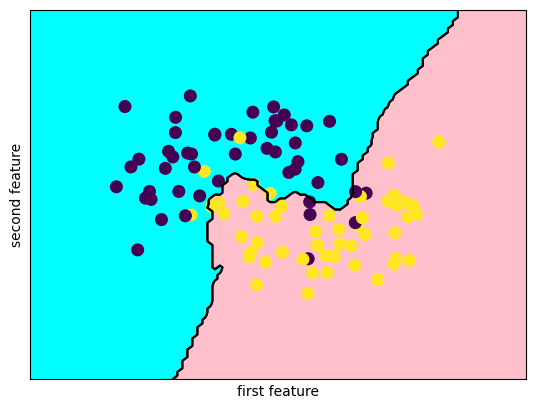

In [40]:
# Метод случайного леса (5)
rdf = RandomForestClassifier(n_estimators=5)
# Обучение моделм 
rdf.fit(X_train, y_train)
# Оценка качества модели
prediction = rdf.predict(X_test)
# Вывод сводной информации
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Prediction and test: 
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 5 16]]
Accuracy score:  0.8285714285714286


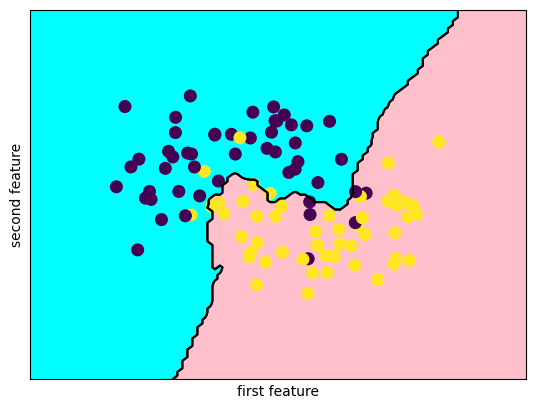

In [41]:
# Метод случайного леса (10)
rdf = RandomForestClassifier(n_estimators=10)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Prediction and test: 
[1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [11 10]]
Accuracy score:  0.6571428571428571


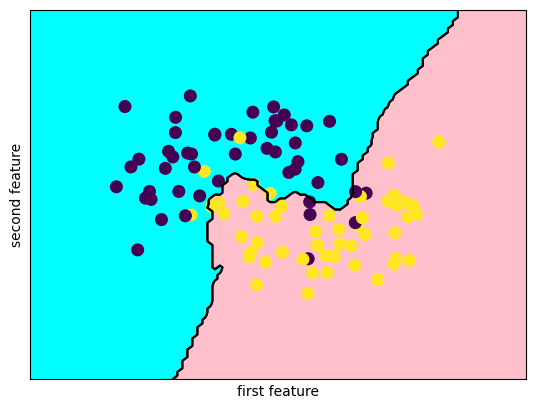

In [42]:
# Метод случайного леса (15)
rdf = RandomForestClassifier(n_estimators=15)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Prediction and test: 
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 4 17]]
Accuracy score:  0.8571428571428571


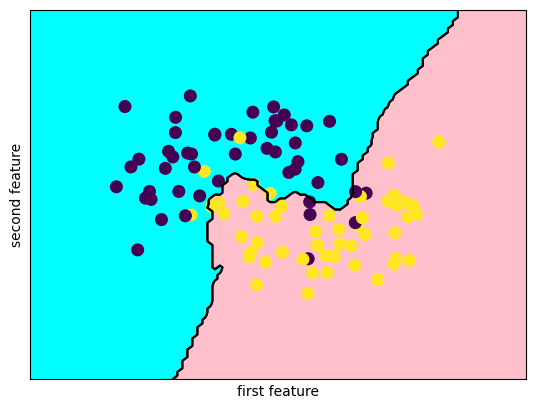

In [43]:
# Метод случайного леса (20)
rdf = RandomForestClassifier(n_estimators=20)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

Prediction and test: 
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 5 16]]
Accuracy score:  0.8285714285714286


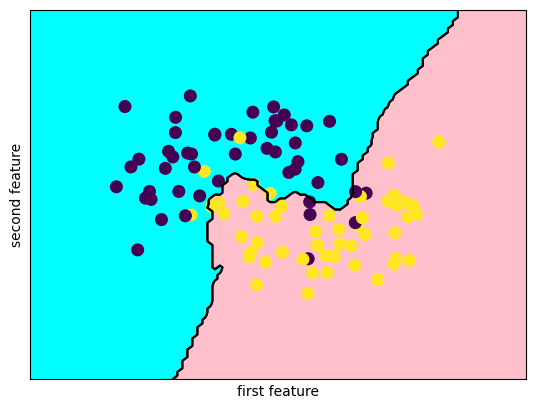

In [48]:
# Метод случайного леса (50)
rdf = RandomForestClassifier(n_estimators=50)
# Обучаем модель данных
rdf.fit(X_train, y_train)
# Оцениваем качество модели
prediction = rdf.predict(X_test)
# Выводим сводную информацию
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))

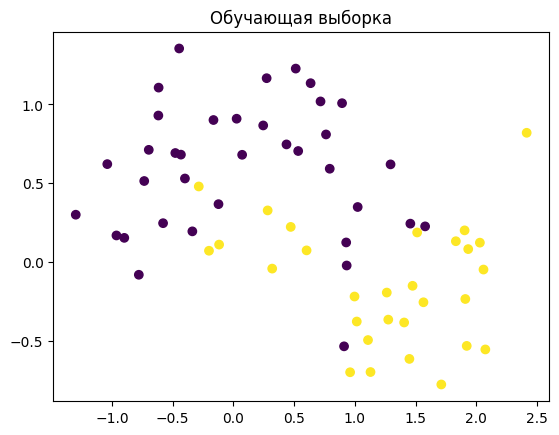

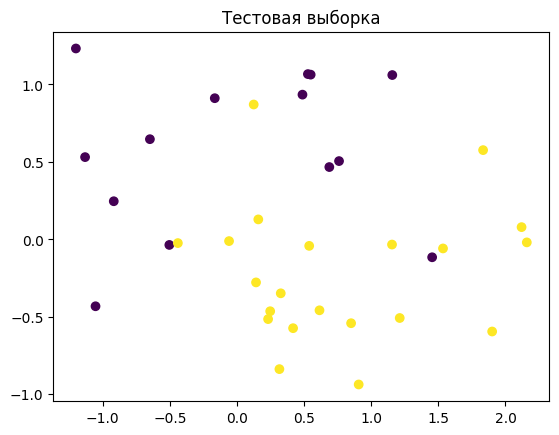

Prediction and test: 
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0]
[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0]
Confusion matrix: 
[[13  1]
 [ 4 17]]
Accuracy score:  0.8571428571428571


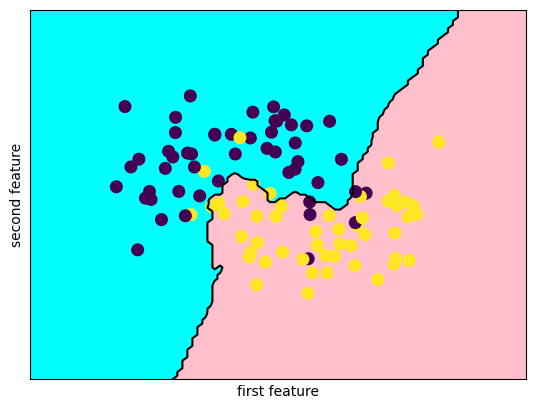

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.35,  random_state=23)

# Разбиение выборки 65% обучающегося и  35% тестового множества
plt.title('Обучающая выборка')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

plt.title('Тестовая выборка')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()
# Вывод результатов
roc_auc_score(y_test, prediction)
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)
print ('Prediction and test: ')
print (prediction)
print (y_test)
print ('Confusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('Accuracy score: ', accuracy_score(prediction, y_test))